# Notebook to test the PR650
### 11/11/21 LGJ
Testing with pyschopy hardware tools from psychopy API.  https://psychopy.org/api/hardware/index.html
See also http://www.photoresearch.com/ 

In [1]:
#from psychopy import hardware, logging
from psychopy import logging
from psychopy.hardware.pr import PR650
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# logging needs to be actively enabled
# only if needed:
logging.console.setLevel(logging.ERROR)  # error messages only
logging.console.setLevel(logging.INFO)  # will give more info
logging.console.setLevel(logging.DEBUG)  # log all communications

"""Additional debugging notes: If you’re using a keyspan adapter (at least on macOS) 
be aware that it needs a driver installed. Otherwise no ports will be found.

Also note that the attempt to connect to the PR650 must occur within the first few seconds after turning it on."""

'Additional debugging notes: If you’re using a keyspan adapter (at least on macOS) \nbe aware that it needs a driver installed. Otherwise no ports will be found.\n\nAlso note that the attempt to connect to the PR650 must occur within the first few seconds after turning it on.'

In [4]:
# sweeps "likely known" ports for Mac/Linux searching for a PR650
# example from https://psychopy.org/api/hardware/index.html

# photom = hardware.findPhotometer(device='PR650')
# print(photom.getLum())
# if hasattr(photom, 'getSpectrum'):
#     # can retrieve spectrum (e.g. the PR650)
#     print(photom.getSpectrum())

87.2088 	INFO 	scanning serial ports...
87.2165 	INFO 	.../dev/tty.usbserial-A104D0XS
87.2270 	INFO 	Successfully opened /dev/tty.usbserial-A104D0XS
87.3275 	DEBUG 	b1

87.8290 	ERROR 	PR650 isn't communicating
87.8290 	INFO 	closing port
87.8334 	INFO 	...nope!
	


AttributeError: 'NoneType' object has no attribute 'getLum'

In [3]:
"""This code works!  If you need to find the port name again try uncommenting the code block above"""

myPR650 = PR650(port='/dev/tty.usbserial-A104D0XS')
myPR650.measure()  # make a measurement
nm, power = myPR650.getLastSpectrum()  # get a power spectrum for the last measurement

In [4]:
print(nm)

['0380.' '0384.' '0388.' '0392.' '0396.' '0400.' '0404.' '0408.' '0412.'
 '0416.' '0420.' '0424.' '0428.' '0432.' '0436.' '0440.' '0444.' '0448.'
 '0452.' '0456.' '0460.' '0464.' '0468.' '0472.' '0476.' '0480.' '0484.'
 '0488.' '0492.' '0496.' '0500.' '0504.' '0508.' '0512.' '0516.' '0520.'
 '0524.' '0528.' '0532.' '0536.' '0540.' '0544.' '0548.' '0552.' '0556.'
 '0560.' '0564.' '0568.' '0572.' '0576.' '0580.' '0584.' '0588.' '0592.'
 '0596.' '0600.' '0604.' '0608.' '0612.' '0616.' '0620.' '0624.' '0628.'
 '0632.' '0636.' '0640.' '0644.' '0648.' '0652.' '0656.' '0660.' '0664.'
 '0668.' '0672.' '0676.' '0680.' '0684.' '0688.' '0692.' '0696.' '0700.'
 '0704.' '0708.' '0712.' '0716.' '0720.' '0724.' '0728.' '0732.' '0736.'
 '0740.' '0744.' '0748.' '0752.' '0756.' '0760.' '0764.' '0768.' '0772.'
 '0776.' '0780.']


In [23]:
print(power)

['1.004E-06' '8.151E-07' '4.124E-07' '1.010E-06' '4.804E-07' '3.875E-06'
 '1.266E-05' '1.208E-05' '5.512E-06' '3.502E-06' '4.602E-06' '7.002E-06'
 '1.253E-05' '3.681E-05' '7.053E-05' '5.484E-05' '2.780E-05' '2.129E-05'
 '1.993E-05' '1.782E-05' '1.515E-05' '1.280E-05' '1.069E-05' '9.029E-06'
 '8.261E-06' '1.185E-05' '2.649E-05' '4.150E-05' '4.159E-05' '2.907E-05'
 '1.606E-05' '7.822E-06' '3.296E-06' '2.222E-06' '2.555E-06' '1.739E-06'
 '2.056E-06' '2.188E-06' '4.952E-06' '2.306E-05' '9.891E-05' '1.933E-04'
 '1.532E-04' '7.441E-05' '2.879E-05' '8.578E-06' '3.995E-06' '3.732E-06'
 '8.142E-06' '2.705E-05' '6.851E-05' '1.315E-04' '1.634E-04' '1.535E-04'
 '1.244E-04' '1.116E-04' '2.143E-04' '8.208E-04' '1.541E-03' '1.277E-03'
 '7.378E-04' '5.599E-04' '5.079E-04' '4.247E-04' '2.271E-04' '1.022E-04'
 '1.089E-04' '1.551E-04' '1.792E-04' '1.331E-04' '1.166E-04' '1.315E-04'
 '1.241E-04' '1.048E-04' '9.905E-05' '1.019E-04' '1.097E-04' '1.198E-04'
 '1.052E-04' '7.590E-05' '7.238E-05' '1.890E-04' '3

In [32]:
# Either the PR650 or psychopy extracts the power output as an array of STRINGS (in exponential E notation)
# I think this is insane, but whatever.
# I also don't know what units these values are yet... maybe Watts?
# TODO: check the PR650 documentation
power.dtype

dtype('<U9')

In [41]:
float_power = np.full_like(power, 0, dtype=float)
for x in range(len(power)):
    float_power[x] = float_power[x]+float(power[x])
print(float_power)

[1.004e-06 8.151e-07 4.124e-07 1.010e-06 4.804e-07 3.875e-06 1.266e-05
 1.208e-05 5.512e-06 3.502e-06 4.602e-06 7.002e-06 1.253e-05 3.681e-05
 7.053e-05 5.484e-05 2.780e-05 2.129e-05 1.993e-05 1.782e-05 1.515e-05
 1.280e-05 1.069e-05 9.029e-06 8.261e-06 1.185e-05 2.649e-05 4.150e-05
 4.159e-05 2.907e-05 1.606e-05 7.822e-06 3.296e-06 2.222e-06 2.555e-06
 1.739e-06 2.056e-06 2.188e-06 4.952e-06 2.306e-05 9.891e-05 1.933e-04
 1.532e-04 7.441e-05 2.879e-05 8.578e-06 3.995e-06 3.732e-06 8.142e-06
 2.705e-05 6.851e-05 1.315e-04 1.634e-04 1.535e-04 1.244e-04 1.116e-04
 2.143e-04 8.208e-04 1.541e-03 1.277e-03 7.378e-04 5.599e-04 5.079e-04
 4.247e-04 2.271e-04 1.022e-04 1.089e-04 1.551e-04 1.792e-04 1.331e-04
 1.166e-04 1.315e-04 1.241e-04 1.048e-04 9.905e-05 1.019e-04 1.097e-04
 1.198e-04 1.052e-04 7.590e-05 7.238e-05 1.890e-04 3.705e-04 3.519e-04
 1.844e-04 5.366e-05 1.795e-05 1.390e-05 1.230e-05 1.316e-05 1.355e-05
 1.587e-05 1.730e-05 1.438e-05 3.410e-05 6.035e-05 4.738e-05 2.520e-05
 1.422

In [42]:
# The graphed output looks crazy (very linear with one little dip) unless you log transform
# Maybe look in the PR650 documentation or ask Austin about this at some point
log_power = np.log(float_power)

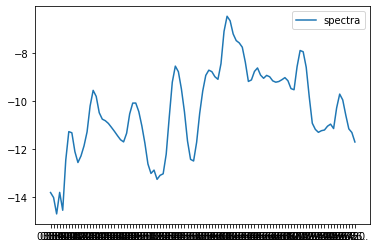

In [43]:
fig, ax = plt.subplots()
ax.plot(nm, log_power, label = "spectra")
plt.legend()
plt.show()